In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from skimage.color import gray2rgb

In [2]:
# get dataset and split it into two datasets (training, testing)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

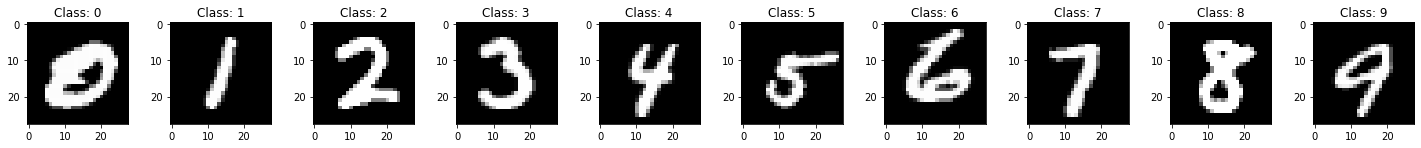

In [3]:
numbers = []
for i in range(10):
    indexes = np.where(y_test == i)
    all_indexes = np.hstack(indexes)
    numbers.append(all_indexes[-1])

# show examples
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
fig.tight_layout()
for i, ax in enumerate(axes.flat):
    ax.imshow(gray2rgb(X_test[numbers][i]), interpolation = 'none')
    ax.title.set_text(f'Class: {y_test[numbers][i]}')

In [4]:
def preprocess_data(x, y, limit):
    indexes = []
    n = 10
    
    for i in range(n):
        indexes.append(np.where(y == i)[0][:limit])

    all_indexes = np.hstack(indexes)
    all_indexes = np.random.permutation(all_indexes)
    
    x, y = x[all_indexes], y[all_indexes]
    # x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    # y = y.reshape(len(y), 1, n)
    return x, y

In [5]:
# preprocessing the data
X_train, y_train = preprocess_data(X_train, y_train, 300)
X_test, y_test = preprocess_data(X_test, y_test, 50)

In [6]:
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (3000, 28, 28, 1)
3000 train samples
500 test samples


In [8]:
import keras

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=np.shape(X_train)[1:]),
        keras.layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0

In [11]:
model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.1)

Epoch 1/20
54/54 [==============================] - 2s 22ms/step - loss: 2.0406 - accuracy: 0.3200 - val_loss: 1.4657 - val_accuracy: 0.7100
Epoch 2/20
54/54 [==============================] - 1s 19ms/step - loss: 1.0535 - accuracy: 0.6911 - val_loss: 0.4962 - val_accuracy: 0.8867
Epoch 3/20
54/54 [==============================] - 1s 20ms/step - loss: 0.5403 - accuracy: 0.8337 - val_loss: 0.2913 - val_accuracy: 0.9600
Epoch 4/20
54/54 [==============================] - 1s 20ms/step - loss: 0.4014 - accuracy: 0.8793 - val_loss: 0.2491 - val_accuracy: 0.9500
Epoch 5/20
54/54 [==============================] - 1s 19ms/step - loss: 0.3247 - accuracy: 0.9030 - val_loss: 0.2264 - val_accuracy: 0.9567
Epoch 6/20
54/54 [==============================] - 1s 20ms/step - loss: 0.2715 - accuracy: 0.9193 - val_loss: 0.2074 - val_accuracy: 0.9600
Epoch 7/20
54/54 [==============================] - 1s 20ms/step - loss: 0.2574 - accuracy: 0.9211 - val_loss: 0.2010 - val_accuracy: 0.9633
Epoch 8/20
54

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.9739999771118164
